# **Web Scraping Using Beautifulsoup**

In [2]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test=[]
team1=[]
team2=[]
winner=[]
venue=[]
day=[]
match_id=[]
match_link=[]

player_name=[]
out_notout=[]
minutes=[]
fours=[]
sixers=[]
strike_rate=[]

batting_list=[]

bowling_list=[]

for i in range(2019,2024):
    URL= "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id={};team=6;type=year".format(i)
    
    Page=requests.get(URL)
    html=Page.text
    soup = BeautifulSoup(html)
    
    line=str(soup.find_all("tr",attrs={"class":"data1"}))
    
    reg='href="\/([\/\w]+match\/[\d]+\.html)'
    
    link_tail=re.findall(reg,line)
    
    link_head="https://stats.espncricinfo.com/"
    
    for z in range(len(link_tail)):
        link=link_head+link_tail[z]
        match_link.append(link)
        url1=link
        Page1=requests.get(url1)
        html1=Page1.text
        soup1 = BeautifulSoup(html1)
        table=soup1.find_all("div",class_="ds-rounded-lg ds-mt-2")
        table1=soup1.find_all("div",class_="ds-rounded-lg ds-mt-2")
        table2=soup1.find_all("table",class_="ds-w-full ds-table ds-table-md ds-table-auto")
        #print(i,link)
  
    
        for i in table:
            if i.find("span",class_="ds-text-title-xs ds-font-bold ds-capitalize").text=="India":
                for k in i.find_all("td"):
                    batting_list.append(k.text)
                    if k.text=="Extras":
                        break
                    #print(k.text)
                for k in table2:
                    for l in k.find_all("td",class_={"ds-min-w-max","ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right","ds-w-0 ds-whitespace-nowrap ds-text-right"}):
                        bowling_list.append(l.text)
                        #print(l.text)

        

                    
    matches_all=soup.find_all("tr",attrs={"class":"data1"})
    for match in matches_all:
        test.append(match.text.strip().replace("\n",","))
for i in range(batting_list.count('')):
    batting_list.remove('')  
for i in range(batting_list.count('Extras')):
    batting_list.remove('Extras')        


        
player_name=batting_list[:-1:8]
out_notout=batting_list[1:-1:8]
runs=batting_list[2:-1:8]    
balls=batting_list[3:-1:8]
minutes=batting_list[4:-1:8]
fours=batting_list[5:-1:8]
sixers=batting_list[6:-1:8]
strike_rate=batting_list[7:-1:8]+[batting_list[-1]]     
        
        
        
bowler=bowling_list[:-1:11]
overs=bowling_list[1:-1:11]
maidens=bowling_list[2:-1:11]
runs_given=bowling_list[3:-1:11]    
wickets=bowling_list[4:-1:11]
ECON=bowling_list[5:-1:11]
dots=bowling_list[6:-1:11]
WD=bowling_list[9:-1:11]
NB=bowling_list[10:-1:11]+[bowling_list[-1]]     
    
        
print(len(bowler))
print(len(overs))
print(len(maidens))
print(len(runs_given))
print(len(wickets))
print(len(ECON))
print(len(dots))
print(len(WD))
print(len(NB))
        
        
print(len(player_name))
print(len(out_notout))
print(len(runs))
print(len(balls))
print(len(minutes))
print(len(fours))
print(len(sixers))
print(len(strike_rate))       


    
    
for x in test:
    team1.append(x.split(",")[0])
    team2.append(x.split(",")[1])
    winner.append(x.split(",")[2])
    venue.append(x.split(",")[4])
    day.append(x.split(",")[5]+x.split(",")[6])
    match_id.append(x.split(",")[-1])

Rohit Sharma 
c Maxwell b Stoinis
133
129
204
10
6
103.10

Shikhar Dhawan 
lbw b Behrendorff
0
1
4
0
0
0.00

Virat Kohli (c)
c Stoinis b Richardson
3
8
10
0
0
37.50

Ambati Rayudu 
lbw b Richardson
0
2
2
0
0
0.00

MS Dhoni †
lbw b Behrendorff
51
96
110
3
1
53.12

Dinesh Karthik 
 b Richardson
12
21
30
0
0
57.14

Ravindra Jadeja 
c Marsh b Richardson
8
13
20
0
0
61.53

Bhuvneshwar Kumar 
not out 
29
23
28
4
0
126.08
Kuldeep Yadav 
c Khawaja b Siddle
3
6
14
0
0
50.00

Mohammed Shami 
c Maxwell b Stoinis
1
2
4
0
0
50.00

Rohit Sharma 
c Handscomb b Stoinis
43
52
71
2
2
82.69

Shikhar Dhawan 
c Khawaja b Behrendorff
32
28
31
5
0
114.28

Virat Kohli (c)
c Maxwell b Richardson
104
112
150
5
2
92.85

Ambati Rayudu 
c Stoinis b Maxwell
24
36
47
2
0
66.66

MS Dhoni †
not out 
55
54
96
0
2
101.85
Dinesh Karthik 
not out 
25
14
33
2
0
178.57
Rohit Sharma 
c Marsh b Siddle
9
17
-
1
0
52.94

Shikhar Dhawan 
c & b Stoinis
23
46
-
0
0
50.00

Virat Kohli (c)
c †Carey b Richardson
46
62
-
3
0
74.19

MS

KL Rahul 
c †MDKJ Perera b Malinga
111
118
180
11
1
94.06

Rohit Sharma 
c Mathews b Rajitha
103
94
133
14
2
109.57

Virat Kohli (c)
not out 
34
41
61
3
0
82.92
Rishabh Pant 
lbw b Udana
4
4
6
1
0
100.00

Hardik Pandya 
not out 
7
4
8
1
0
175.00
KL Rahul 
c †Latham b Henry
1
7
18
0
0
14.28

Rohit Sharma 
c †Latham b Henry
1
4
7
0
0
25.00

Virat Kohli (c)
lbw b Boult
1
6
8
0
0
16.66

Rishabh Pant 
c de Grandhomme b Santner
32
56
89
4
0
57.14

Dinesh Karthik 
c Neesham b Henry
6
25
29
1
0
24.00

Hardik Pandya 
c Williamson b Santner
32
62
81
2
0
51.61

MS Dhoni †
run out (Guptill)
50
72
114
1
1
69.44

Ravindra Jadeja 
c Williamson b Boult
77
59
84
4
4
130.50

Bhuvneshwar Kumar 
 b Ferguson
0
1
10
0
0
0.00

Yuzvendra Chahal 
c †Latham b Neesham
5
5
8
1
0
100.00

Jasprit Bumrah 
not out 
0
0
4
0
0
-
Shikhar Dhawan 
lbw b Cottrell
2
3
4
0
0
66.66

Rohit Sharma 
c Pooran b Chase
18
34
75
2
0
52.94

Virat Kohli (c)
c Roach b Brathwaite
120
125
179
14
1
96.00

Rishabh Pant †
 b Brathwaite
20
3

Prithvi Shaw 
 b PWH de Silva
13
11
16
3
0
118.18

Shikhar Dhawan (c)
lbw b PWH de Silva
29
38
61
6
0
76.31

Ishan Kishan †
 b Rajitha
1
4
13
0
0
25.00

Manish Pandey 
run out (Shanaka)
37
31
64
3
0
119.35

Suryakumar Yadav 
lbw b Sandakan
53
44
78
6
0
120.45

Hardik Pandya 
c DM de Silva b Shanaka
0
3
6
0
0
0.00

Krunal Pandya 
 b PWH de Silva
35
54
79
3
0
64.81

Deepak Chahar 
not out 
69
82
98
7
1
84.14
Bhuvneshwar Kumar 
not out 
19
28
62
2
0
67.85
Prithvi Shaw 
lbw b Shanaka
49
49
71
8
0
100.00

Shikhar Dhawan (c)
c †Bhanuka b Chameera
13
11
14
3
0
118.18

Sanju Samson †
c Fernando b Jayawickrama
46
46
70
5
1
100.00

Manish Pandey 
c †Bhanuka b Jayawickrama
11
19
46
0
0
57.89

Suryakumar Yadav 
lbw b Dananjaya
40
37
63
7
0
108.10

Hardik Pandya 
lbw b Jayawickrama
19
17
18
3
0
111.76

Nitish Rana 
c †Bhanuka b Dananjaya
7
14
22
0
0
50.00

Krishnappa Gowtham 
lbw b Dananjaya
2
3
8
0
0
66.66

Rahul Chahar 
c & b Karunaratne
13
25
41
0
0
52.00

Navdeep Saini 
c Fernando b Chameera
15

Shikhar Dhawan (c)
c Ferguson b Henry
3
10
-
0
0
30.00

Shubman Gill 
not out 
45
42
-
4
1
107.14
Suryakumar Yadav 
not out 
34
25
-
2
3
136.00
Shikhar Dhawan (c)
 b Milne
28
45
54
3
1
62.22

Shubman Gill 
c Santner b Milne
13
22
34
2
0
59.09

Shreyas Iyer 
c Conway b Ferguson
49
59
81
8
0
83.05

Rishabh Pant †
c Phillips b Mitchell
10
16
36
2
0
62.50

Suryakumar Yadav 
c Southee b Milne
6
10
17
0
0
60.00

Deepak Hooda 
c †Latham b Southee
12
25
44
0
0
48.00

Washington Sundar 
c †Latham b Southee
51
64
104
5
1
79.68

Deepak Chahar 
c Southee b Mitchell
12
9
15
0
2
133.33

Yuzvendra Chahal 
c Southee b Santner
8
22
36
0
0
36.36

Arshdeep Singh 
lbw b Mitchell
9
9
10
0
1
100.00

Umran Malik 
not out 
0
4
6
0
0
0.00
Rohit Sharma (c)
 b Shakib Al Hasan
27
31
47
4
1
87.09

Shikhar Dhawan 
 b Mehidy Hasan Miraz
7
17
28
1
0
41.17

Virat Kohli 
c Litton Das b Shakib Al Hasan
9
15
22
1
0
60.00

Shreyas Iyer 
c †Mushfiqur Rahim b Ebadot Hossain
24
39
47
2
0
61.53

KL Rahul †
c Anamul Haque b Eb

In [4]:
Bowling_data=pd.DataFrame({"Bowler":bowler,"Overs":overs,"Maidens":maidens,"runs_given":runs_given,"Wickets":wickets,"ECON":ECON,"Dotballs":dots,"Wideballs":WD,"Noballs":NB})
Bowling_data.head()

,Bowler,Overs,Maidens,runs_given,Wickets,ECON,Dotballs,Wideballs,Noballs
0,Bhuvneshwar Kumar,10,0,66,2,6.60,30,1,0
1,Khaleel Ahmed,8,0,55,0,6.87,21,2,2
2,Mohammed Shami,10,0,46,0,4.60,31,3,0
3,Kuldeep Yadav,10,0,54,2,5.40,26,0,0
4,Ravindra Jadeja,10,0,48,1,4.80,25,0,0


In [5]:
Batting_data=pd.DataFrame({"Player_name":player_name,"Out_Not":out_notout,"Runs":runs,"Balls":balls,"Time":minutes,"Fours":fours,"Sixers":sixers,"Strike_rate":strike_rate})
Batting_data.head()

,Player_name,Out_Not,Runs,Balls,Time,Fours,Sixers,Strike_rate
0,Rohit Sharma,c Maxwell b Stoinis,133,129,204,10,6,103.10
1,Shikhar Dhawan,lbw b Behrendorff,0,1,4,0,0,0.00
2,Virat Kohli (c),c Stoinis b Richardson,3,8,10,0,0,37.50
3,Ambati Rayudu,lbw b Richardson,0,2,2,0,0,0.00
4,MS Dhoni †,lbw b Behrendorff,51,96,110,3,1,53.12


In [6]:
T_test_matches=[]
T_team1=[]
T_team2=[]
T_winner=[]
T_venue=[]
T_day=[]
T_match_id=[]
T_match_link=[]

T_player_name=[]
T_out_notout=[]
T_minutes=[]
T_fours=[]
T_sixers=[]
T_strike_rate=[]

T_batting_list=[]

T_bowling_list=[]

for i in range(2019,2024):
    T_URL= "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=1;id={};team=6;type=year".format(i)
    
    T_Page=requests.get(T_URL)
    T_html=T_Page.text
    T_soup = BeautifulSoup(T_html)
    
    T_line=str(T_soup.find_all("tr",attrs={"class":"data1"}))
    
    T_reg='href="\/([\/\w]+match\/[\d]+\.html)'
    
    T_link_tail=re.findall(T_reg,T_line)
    
    T_link_head="https://stats.espncricinfo.com/"
    
    for z in range(len(T_link_tail)):
        T_link=T_link_head+T_link_tail[z]
        T_match_link.append(T_link)
        T_url1=T_link
        T_Page1=requests.get(T_url1)
        T_html1=T_Page1.text
        T_soup1 = BeautifulSoup(T_html1)
        T_table=T_soup1.find_all("div",class_="ds-rounded-lg ds-mt-2")
        T_table1=T_soup1.find_all("div",class_="ds-rounded-lg ds-mt-2")
        T_table2=T_soup1.find_all("table",class_="ds-w-full ds-table ds-table-md ds-table-auto")
        #print(i,link)                          #ds-w-full ds-table ds-table-md ds-table-auto 
        for i in T_table:
            if i.find("span",class_="ds-text-title-xs ds-font-bold ds-capitalize").text=="India":
                for k in i.find_all("td"):
                    T_batting_list.append(k.text)
                    if k.text=="Extras":
                        break
                    #print(k.text)
                for k in T_table2:
                    for l in k.find_all("td",class_={"ds-min-w-max","ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right","ds-w-0 ds-whitespace-nowrap ds-text-right"}):
                        T_bowling_list.append(l.text)                         #ds-w-0 ds-whitespace-nowrap ds-text-right
                        #print(l.text)

        for idx in T_table1:
            if T_table1[0].find("span",class_="ds-text-title-xs ds-font-bold ds-capitalize").text=="India":
                index=1
            else:
                index=0
                #if i.find("span",class_="ds-text-title-xs ds-font-bold ds-capitalize").text=="India":
                
                    
    T_matches_all=T_soup.find_all("tr",attrs={"class":"data1"})
    for T_match in T_matches_all:
        T_test_matches.append(T_match.text.strip().replace("\n",","))
    for i in range(T_batting_list.count('')):
        T_batting_list.remove('')  
    for i in range(T_batting_list.count('Extras')):
        T_batting_list.remove('Extras')        
    for i in range(T_bowling_list.count('')):
        T_bowling_list.remove('')
    for i in range(T_bowling_list.count('\xa0')):
        T_bowling_list.remove('\xa0')
        
T_player_name=T_batting_list[:-1:8]
T_out_notout=T_batting_list[1:-1:8]
T_runs=T_batting_list[2:-1:8]    
T_balls=T_batting_list[3:-1:8]
T_minutes=T_batting_list[4:-1:8]
T_fours=T_batting_list[5:-1:8]
T_sixers=T_batting_list[6:-1:8]
T_strike_rate=T_batting_list[7:-1:8]+[T_batting_list[-1]]     
        
        
        
T_bowler=T_bowling_list[:-1:11]
T_overs=T_bowling_list[1:-1:11]
T_maidens=T_bowling_list[2:-1:11]
T_runs_given=T_bowling_list[3:-1:11]    
T_wickets=T_bowling_list[4:-1:11]
T_ECON=T_bowling_list[5:-1:11]
T_dots=T_bowling_list[6:-1:11]
T_WD=T_bowling_list[9:-1:11]
T_NB=T_bowling_list[10:-1:11]+[T_bowling_list[-1]]     
    
        
print(len(T_bowler))
print(len(T_overs))
print(len(T_maidens))
print(len(T_runs_given))
print(len(T_wickets))
print(len(T_ECON))
print(len(T_dots))
print(len(T_WD))
print(len(T_NB))
        
        
print(len(T_player_name))
print(len(T_out_notout))
print(len(T_runs))
print(len(T_balls))
print(len(T_fours))
print(len(T_sixers))
print(len(T_strike_rate))       
        

    
    
for x in T_test_matches:
    T_team1.append(x.split(",")[0])
    T_team2.append(x.split(",")[1])
    T_winner.append(x.split(",")[2])
    T_venue.append(x.split(",")[4])
    T_day.append(x.split(",")[5]+x.split(",")[6])
    T_match_id.append(x.split(",")[-1])

1137
1137
1137
1137
1137
1137
1137
1137
1137
576
576
576
576
576
576
576


In [7]:
Test_Batting_data=pd.DataFrame({"Player_name":T_player_name,"Out_Not":T_out_notout,"Runs":T_runs,"Balls":T_balls,"Time":T_minutes,"Fours":T_fours,"Sixers":T_sixers,"Strike_rate":T_strike_rate})
Test_Batting_data.head()

,Player_name,Out_Not,Runs,Balls,Time,Fours,Sixers,Strike_rate
0,Mayank Agarwal,c Starc b Lyon,77,112,-,7,2,68.75
1,KL Rahul,c Marsh b Hazlewood,9,6,-,2,0,150.00
2,Cheteshwar Pujara,c & b Lyon,193,373,-,22,0,51.74
3,Virat Kohli (c),c †Paine b Hazlewood,23,59,-,4,0,38.98
4,Ajinkya Rahane,c †Paine b Starc,18,55,-,1,0,32.72


In [8]:
Test_Bowling_data=pd.DataFrame({"Bowler":T_bowler,"Overs":T_overs,"Maidens":T_maidens,"runs_given":T_runs_given,"Wickets":T_wickets,"ECON":T_ECON,"Dotballs":T_dots,"Wideballs":T_WD,"Noballs":T_NB})
Test_Bowling_data.tail()

,Bowler,Overs,Maidens,runs_given,Wickets,ECON,Dotballs,Wideballs,Noballs
1132,Shakib Al Hasan,14,0,50,2,3.57,55,0,0
1133,Taijul Islam,11,4,14,0,1.27,56,0,0
1134,Mehidy Hasan Miraz,19,4,63,5,3.31,81,0,0
1135,Taskin Ahmed,1,0,4,0,4.00,4,0,0
1136,Khaled Ahmed,2,0,12,0,6.00,7,0,0


# Exporting

In [9]:
Batting_data.to_csv(r"C:\Users\hp\Desktop\Redball-Whiteball\ODI_Batting.csv", index=False)

In [10]:
Bowling_data.to_csv(r"C:\Users\hp\Desktop\Redball-Whiteball\ODI_Bowling.csv", index=False)

In [11]:
Test_Batting_data.to_csv(r"C:\Users\hp\Desktop\Redball-Whiteball\Test_Batting.csv", index=False)

In [12]:
Test_Bowling_data.to_csv(r"C:\Users\hp\Desktop\Redball-Whiteball\Test_Bowling.csv", index=False)

# Data Cleaning(ODI Matches)

In [13]:
ODI_batting=pd.read_csv(r"C:\Users\hp\Desktop\Redball-Whiteball\ODI_Batting.csv")
ODI_bowling=pd.read_csv(r"C:\Users\hp\Desktop\Redball-Whiteball\ODI_Bowling.csv")

In [14]:
ODI_batting.head()

,Player_name,Out_Not,Runs,Balls,Time,Fours,Sixers,Strike_rate
0,Rohit Sharma,c Maxwell b Stoinis,133,129,204,10,6,103.10
1,Shikhar Dhawan,lbw b Behrendorff,0,1,4,0,0,0.00
2,Virat Kohli (c),c Stoinis b Richardson,3,8,10,0,0,37.50
3,Ambati Rayudu,lbw b Richardson,0,2,2,0,0,0.00
4,MS Dhoni †,lbw b Behrendorff,51,96,110,3,1,53.12


In [15]:
ODI_batting.tail()

,Player_name,Out_Not,Runs,Balls,Time,Fours,Sixers,Strike_rate
586,Hardik Pandya,c Conway b Duffy,54,38,55,3,3,142.10
587,Washington Sundar,c Mitchell b Tickner,9,14,17,1,0,64.28
588,Shardul Thakur,c †Latham b Tickner,25,17,26,3,1,147.05
589,Kuldeep Yadav,run out (†Latham/Ferguson),3,3,11,0,0,100.00
590,Umran Malik,not out,2,5,7,0,0,40.00


In [16]:
ODI_batting.Out_Not=ODI_batting.Out_Not.apply(lambda x: "Out" if x!="not out " else x)
print(ODI_batting.Out_Not.value_counts())

Out         466
not out     125
Name: Out_Not, dtype: int64


In [17]:
ODI_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player_name  591 non-null    object
 1   Out_Not      591 non-null    object
 2   Runs         591 non-null    int64 
 3   Balls        591 non-null    int64 
 4   Time         591 non-null    object
 5   Fours        591 non-null    int64 
 6   Sixers       591 non-null    int64 
 7   Strike_rate  591 non-null    object
dtypes: int64(4), object(4)
memory usage: 37.1+ KB


In [18]:
ODI_batting["Time"]=Test_Batting_data.Time.apply(lambda x: np.nan if x=="-" else x).astype(float)
ODI_batting["Strike_rate"]=Test_Batting_data.Strike_rate.apply(lambda x: np.nan if x=="-" else x).astype(float)
ODI_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player_name  591 non-null    object 
 1   Out_Not      591 non-null    object 
 2   Runs         591 non-null    int64  
 3   Balls        591 non-null    int64  
 4   Time         496 non-null    float64
 5   Fours        591 non-null    int64  
 6   Sixers       591 non-null    int64  
 7   Strike_rate  573 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 37.1+ KB


In [19]:
ODI_batting.Player_name.value_counts()

Shikhar Dhawan         38
Virat Kohli (c)        37
Shreyas Iyer           33
Rohit Sharma           31
Hardik Pandya          25
                       ..
Chetan Sakariya         1
Rahul Chahar            1
Krishnappa Gowtham      1
Nitish Rana             1
KL Rahul (c)†           1
Name: Player_name, Length: 61, dtype: int64

In [20]:
ODI_batting.describe()

,Runs,Balls,Time,Fours,Sixers,Strike_rate
count,591.000000,591.000000,496.000000,591.000000,591.000000,573.000000
mean,30.954315,32.923858,73.887097,2.964467,0.671743,50.524049
std,33.479813,31.446473,78.304684,3.599966,1.343104,40.202391
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,18.000000,0.000000,0.000000,28.300000
50%,19.000000,23.000000,43.500000,2.000000,0.000000,45.360000
75%,46.000000,48.500000,105.000000,4.000000,1.000000,66.660000
max,210.000000,149.000000,432.000000,24.000000,10.000000,400.000000


In [21]:
ODI_bowling.head()

,Bowler,Overs,Maidens,runs_given,Wickets,ECON,Dotballs,Wideballs,Noballs
0,Bhuvneshwar Kumar,10.0,0,66,2,6.60,30,1,0
1,Khaleel Ahmed,8.0,0,55,0,6.87,21,2,2
2,Mohammed Shami,10.0,0,46,0,4.60,31,3,0
3,Kuldeep Yadav,10.0,0,54,2,5.40,26,0,0
4,Ravindra Jadeja,10.0,0,48,1,4.80,25,0,0


In [22]:
ODI_bowling.tail()

,Bowler,Overs,Maidens,runs_given,Wickets,ECON,Dotballs,Wideballs,Noballs
832,Washington Sundar,6.0,0,49,0,8.16,15,1,0
833,Shardul Thakur,6.0,0,45,3,7.50,15,1,0
834,Umran Malik,7.0,0,52,1,7.42,18,2,0
835,Kuldeep Yadav,9.0,0,62,3,6.88,21,2,0
836,Yuzvendra Chahal,7.2,0,43,2,5.86,22,0,0


In [23]:
ODI_bowling.duplicated().sum()

0

In [24]:
I_bowlers=list(ODI_bowling.Bowler)
Bowler_ind=[]
print(len(I_bowlers))
for i in range (len(I_bowlers)):
    if I_bowlers.count(I_bowlers[i])>10:
        Bowler_ind.append(I_bowlers[i])
print(len(Bowler_ind))

837
368


In [25]:
ODI_bowling["Bowler"]=ODI_bowling.Bowler.apply(lambda x: np.nan if x not in Bowler_ind else x)

In [26]:
ODI_bowling.isnull().sum()

Bowler        469
Overs           0
Maidens         0
runs_given      0
Wickets         0
ECON            0
Dotballs        0
Wideballs       0
Noballs         0
dtype: int64

In [27]:
ODI_bowling.dropna(axis=0, how="any",inplace=True)

In [28]:
ODI_bowling.shape

(368, 9)

In [29]:
ODI_bowling.Bowler.value_counts()

Kuldeep Yadav        44
Yuzvendra Chahal     36
Mohammed Shami       34
Shardul Thakur       29
Jasprit Bumrah       28
Bhuvneshwar Kumar    25
Ravindra Jadeja      25
Hardik Pandya        25
Mohammed Siraj       21
Kedar Jadhav         16
Prasidh Krishna      14
Adam Zampa           13
Washington Sundar    13
Mitchell Santner     12
Pat Cummins          11
Deepak Chahar        11
Glenn Maxwell        11
Name: Bowler, dtype: int64

In [30]:
others=["Adam Zampa","Pat Cummins","Mitchell Santner","Glenn Maxwell"]
ODI_bowling["Bowler"]=ODI_bowling.Bowler.apply(lambda x: np.nan if x in others else x)

In [31]:
print(ODI_bowling.Bowler.value_counts())
print(len(ODI_bowling.Bowler.value_counts()))

Kuldeep Yadav        44
Yuzvendra Chahal     36
Mohammed Shami       34
Shardul Thakur       29
Jasprit Bumrah       28
Bhuvneshwar Kumar    25
Ravindra Jadeja      25
Hardik Pandya        25
Mohammed Siraj       21
Kedar Jadhav         16
Prasidh Krishna      14
Washington Sundar    13
Deepak Chahar        11
Name: Bowler, dtype: int64
13


In [32]:
ODI_bowling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 836
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bowler      321 non-null    object 
 1   Overs       368 non-null    float64
 2   Maidens     368 non-null    int64  
 3   runs_given  368 non-null    int64  
 4   Wickets     368 non-null    int64  
 5   ECON        368 non-null    float64
 6   Dotballs    368 non-null    int64  
 7   Wideballs   368 non-null    int64  
 8   Noballs     368 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 28.8+ KB


# Data Cleaning(Test)

In [33]:
Test_batting=pd.read_csv(r"C:\Users\hp\Desktop\Redball-Whiteball\Test_Batting.csv")
Test_bowling=pd.read_csv(r"C:\Users\hp\Desktop\Redball-Whiteball\Test_Bowling.csv")

In [34]:
Test_batting.head()

,Player_name,Out_Not,Runs,Balls,Time,Fours,Sixers,Strike_rate
0,Mayank Agarwal,c Starc b Lyon,77,112,-,7,2,68.75
1,KL Rahul,c Marsh b Hazlewood,9,6,-,2,0,150.00
2,Cheteshwar Pujara,c & b Lyon,193,373,-,22,0,51.74
3,Virat Kohli (c),c †Paine b Hazlewood,23,59,-,4,0,38.98
4,Ajinkya Rahane,c †Paine b Starc,18,55,-,1,0,32.72


In [35]:
Test_Batting_data["Time"]=Test_Batting_data.Time.apply(lambda x: np.nan if x=="-" else x)
Test_Batting_data["Sixers"]=Test_Batting_data.Sixers.apply(lambda x: np.nan if x=="-" else x)
Test_Batting_data["Strike_rate"]=Test_Batting_data.Strike_rate.apply(lambda x: np.nan if x=="-" else x)

In [36]:
Test_batting.Out_Not=Test_batting.Out_Not.apply(lambda x: "Out" if x!="not out " else x)

In [37]:
Test_batting.Out_Not.value_counts()

Out         501
not out      75
Name: Out_Not, dtype: int64

In [38]:
Test_batting.head()

,Player_name,Out_Not,Runs,Balls,Time,Fours,Sixers,Strike_rate
0,Mayank Agarwal,Out,77,112,-,7,2,68.75
1,KL Rahul,Out,9,6,-,2,0,150.00
2,Cheteshwar Pujara,Out,193,373,-,22,0,51.74
3,Virat Kohli (c),Out,23,59,-,4,0,38.98
4,Ajinkya Rahane,Out,18,55,-,1,0,32.72


In [39]:
Test_bowling.drop_duplicates(inplace=True)

In [40]:
Test_bowling.duplicated().sum()

0

In [41]:
Test_bowling.head()

,Bowler,Overs,Maidens,runs_given,Wickets,ECON,Dotballs,Wideballs,Noballs
0,Mitchell Starc,26.0,0,123,1,4.73,99,0,0
1,Josh Hazlewood,35.0,11,105,2,3.00,164,0,0
2,Pat Cummins,28.0,5,101,0,3.60,126,1,0
3,Nathan Lyon,57.2,8,178,4,3.10,235,0,0
4,Marnus Labuschagne,16.0,0,76,0,4.75,50,0,0


In [42]:
I_bowlers=list(Test_bowling.Bowler)
T_Bowler_ind=[]
print(len(I_bowlers))
for i in range (len(I_bowlers)):
    if I_bowlers.count(I_bowlers[i])>5:
        T_Bowler_ind.append(I_bowlers[i])
print(len(T_Bowler_ind))

621
465


In [43]:
Test_bowling["Bowler"]=Test_bowling.Bowler.apply(lambda x: np.nan if x not in T_Bowler_ind else x)

In [44]:
Test_bowling.Bowler.value_counts()

Ravichandran Ashwin    44
Jasprit Bumrah         40
Mohammed Shami         39
Ravindra Jadeja        37
Mohammed Siraj         29
Ishant Sharma          27
Umesh Yadav            26
Axar Patel             16
James Anderson         14
Shardul Thakur         14
Joe Root               11
Tim Southee            10
Kagiso Rabada          10
Kyle Jamieson          10
Josh Hazlewood          9
Jack Leach              9
Mitchell Starc          9
Pat Cummins             9
Keshav Maharaj          8
Nathan Lyon             8
Ollie Robinson          8
Lungi Ngidi             7
Washington Sundar       7
Ben Stokes              7
Marnus Labuschagne      7
Stuart Broad            7
Moeen Ali               7
Trent Boult             6
Taijul Islam            6
Ajaz Patel              6
Cameron Green           6
Rohit Sharma            6
Marco Jansen            6
Name: Bowler, dtype: int64

Test_bowling.loc[Test_bowling["Bowler"]=="Rohit Sharma"]

In [45]:
T_others=["James Anderson","Joe Root","Tim Southee","Kagiso Rabada","Kyle Jamieson","Josh Hazlewood","Jack Leach","Mitchell Starc","Pat Cummins","Keshav Maharaj","Nathan Lyon","Ollie Robinson","Lungi Ngidi","Ben Stokes","Marnus Labuschagne","Stuart Broad","Moeen Ali","Trent Boult","Taijul Islam","Ajaz Patel","Cameron Green","Marco Jansen"]
Test_bowling["Bowler"]=Test_bowling.Bowler.apply(lambda x: np.nan if x in T_others else x)

In [46]:
Test_bowling.Bowler.value_counts()

Ravichandran Ashwin    44
Jasprit Bumrah         40
Mohammed Shami         39
Ravindra Jadeja        37
Mohammed Siraj         29
Ishant Sharma          27
Umesh Yadav            26
Axar Patel             16
Shardul Thakur         14
Washington Sundar       7
Rohit Sharma            6
Name: Bowler, dtype: int64

In [47]:
Test_bowling.dropna(axis=0, how="any",inplace=True)

In [48]:
Test_bowling.shape

(285, 9)

In [49]:
Test_bowling.describe()

,Overs,Maidens,runs_given,Wickets,ECON,Dotballs,Wideballs,Noballs
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,15.058246,3.249123,42.905263,1.856140,2.972316,70.235088,0.129825,0.582456
std,8.725536,2.682305,25.525080,1.624094,1.214988,41.654567,0.403316,1.390755
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,24.000000,0.000000,2.200000,41.000000,0.000000,0.000000
50%,14.000000,3.000000,41.000000,2.000000,2.870000,64.000000,0.000000,0.000000
75%,21.000000,5.000000,58.000000,3.000000,3.500000,96.000000,0.000000,1.000000
max,55.100000,15.000000,146.000000,7.000000,10.500000,253.000000,3.000000,13.000000


In [50]:
Test_bowling.loc[Test_bowling["Wickets"]>1].value_counts()

Bowler               Overs  Maidens  runs_given  Wickets  ECON  Dotballs  Wideballs  Noballs
Axar Patel           9.1    3        14          2        1.52  46        0          0          1
Ravichandran Ashwin  19.3   3        55          4        2.82  92        0          0          1
                     20.0   7        49          2        2.45  97        0          0          1
                     21.0   5        47          4        2.23  103       0          0          1
                            6        45          2        2.14  106       0          0          1
                                                                                               ..
Mohammed Shami       10.3   2        36          2        3.42  48        0          0          1
                     10.5   2        35          5        3.23  52        0          0          1
                     13.0   3        34          2        2.61  63        0          0          1
                         

In [51]:
innings={}
for i in list(Test_bowling.Bowler):
    innings.update({i:(list(Test_bowling.Bowler).count(i))})
innings

{'Mohammed Shami': 39,
 'Jasprit Bumrah': 40,
 'Ravindra Jadeja': 37,
 'Ishant Sharma': 27,
 'Ravichandran Ashwin': 44,
 'Rohit Sharma': 6,
 'Umesh Yadav': 26,
 'Mohammed Siraj': 29,
 'Shardul Thakur': 14,
 'Washington Sundar': 7,
 'Axar Patel': 16}

In [52]:
Test_bowling.Bowler.apply(lambda x: innings[x])

7       39
8       40
9       37
12      39
13      40
        ..
1101    16
1107    26
1108    44
1110    29
1111    16
Name: Bowler, Length: 285, dtype: int64

In [53]:
Test_bowling["Innings_played"]=Test_bowling.Bowler.apply(lambda x: innings[x])

In [54]:
Test_bowling.reset_index(inplace=True,drop=True)

In [55]:
Test_bowling

,Bowler,Overs,Maidens,runs_given,Wickets,ECON,Dotballs,Wideballs,Noballs,Innings_played
0,Mohammed Shami,19.0,2,58,2,3.05,84,0,0,39
1,Jasprit Bumrah,21.0,5,62,1,2.95,97,1,0,40
2,Ravindra Jadeja,32.0,11,73,2,2.28,161,0,0,37
3,Mohammed Shami,2.0,1,4,0,2.00,11,0,0,39
4,Jasprit Bumrah,2.0,1,2,0,1.00,11,0,0,40
...,...,...,...,...,...,...,...,...,...,...
280,Axar Patel,12.0,3,32,0,2.66,58,0,0,16
281,Umesh Yadav,9.0,1,32,1,3.55,40,0,0,26
282,Ravichandran Ashwin,22.0,2,66,2,3.00,88,0,0,44
283,Mohammed Siraj,11.0,0,41,2,3.72,48,1,0,29


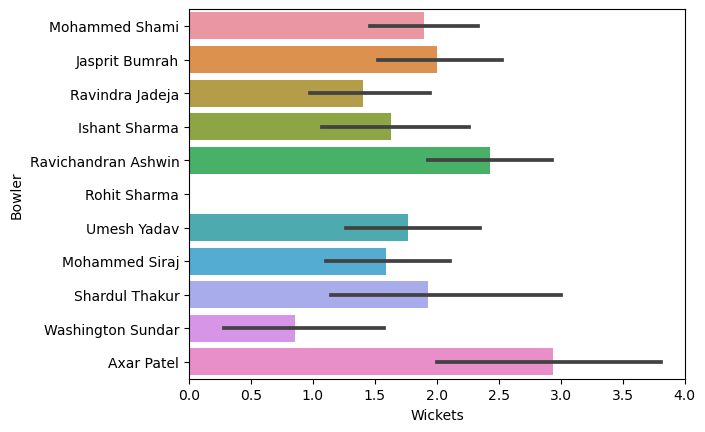

In [56]:
sns.barplot(x="Wickets",y="Bowler",data=Test_bowling)
plt.show()

In [57]:
URL= "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2020;team=6;type=year"

Page=requests.get(URL)
html=Page.text
soup = BeautifulSoup(html)

line=str(soup.find_all("tr",attrs={"class":"data1"}))

reg='href="\/([\/\w]+match\/[\d]+\.html)'

link_tail=re.findall(reg,line)

link_head="https://stats.espncricinfo.com/"

for z in range(len(link_tail)):
    link=link_head+link_tail[z]
    match_link.append(link)
    url1=link
    Page1=requests.get(url1)
    html1=Page1.text
    soup1 = BeautifulSoup(html1)
    table=soup1.find_all("div",class_="ds-rounded-lg ds-mt-2")
    table1=soup1.find_all("div",class_="ds-rounded-lg ds-mt-2")
    table2=soup1.find_all("table",class_="ds-w-full ds-table ds-table-md ds-table-auto")
    #print(i,link)

    for idx in table1:
        if table[0].find("span",class_="ds-text-title-xs ds-font-bold ds-capitalize").text=="india":
            index=1
        else:
            index=0
    print(index)
          
        for idx in table1:
            if table1[1].find("span",class_="ds-text-title-xs ds-font-bold ds-capitalize").text=="India":
                index=0
            else:
                index=1

IndentationError: unexpected indent (3144447712.py, line 34)

In [ ]:
bowler=bowling_list[:-1:11]
overs=bowling_list[1:-1:11]
maidens=bowling_list[2:-1:11]
runs_given=bowling_list[3:-1:11]    
wickets=bowling_list[4:-1:11]
ECON=bowling_list[5:-1:11]
dots=bowling_list[6:-1:11]
WD=bowling_list[9:-1:11]
NB=bowling_list[10:-1:11]+[bowling_list[-1]] 

In [ ]:
Bowling_data=pd.DataFrame({"Bowler":bowler,"Overs":overs,"Maidens":maidens,"runs_given":runs_given,"Wickets":wickets,"ECON":ECON,"Dotballs":dots,"Wideballs":WD,"Noballs":NB})
Bowling_data.tail(15)

In [58]:
match_id

['ODI # 4077',
 'ODI # 4078',
 'ODI # 4079',
 'ODI # 4082',
 'ODI # 4085',
 'ODI # 4088',
 'ODI # 4091',
 'ODI # 4092',
 'ODI # 4102',
 'ODI # 4106',
 'ODI # 4109',
 'ODI # 4111',
 'ODI # 4113',
 'ODI # 4150',
 'ODI # 4155',
 'ODI # 4161',
 'ODI # 4169',
 'ODI # 4175',
 'ODI # 4179',
 'ODI # 4182',
 'ODI # 4187',
 'ODI # 4190',
 'ODI # 4196',
 'ODI # 4197',
 'ODI # 4199',
 'ODI # 4221',
 'ODI # 4222',
 'ODI # 4223',
 'ODI # 4231',
 'ODI # 4232',
 'ODI # 4233',
 'ODI # 4235',
 'ODI # 4239',
 'ODI # 4243',
 'ODI # 4265',
 'ODI # 4266',
 'ODI # 4267',
 'ODI # 4281',
 'ODI # 4283',
 'ODI # 4284',
 'ODI # 4307',
 'ODI # 4309',
 'ODI # 4312',
 'ODI # 4344',
 'ODI # 4346',
 'ODI # 4349',
 'ODI # 4353',
 'ODI # 4355',
 'ODI # 4356',
 'ODI # 4424',
 'ODI # 4428',
 'ODI # 4433',
 'ODI # 4436',
 'ODI # 4438',
 'ODI # 4439',
 'ODI # 4451',
 'ODI # 4454',
 'ODI # 4457',
 'ODI # 4470',
 'ODI # 4471',
 'ODI # 4472',
 'ODI # 4483',
 'ODI # 4487',
 'ODI # 4489',
 'ODI # 4493',
 'ODI # 4496',
 'ODI # 44

In [106]:
URL_all="https://www.espncricinfo.com/player/team/india-6/alpha-"
a="a b c d e f g h i j k l m n  o p q r s t u v w x y z"
alpha=a.split()
player_list1=[]
for i in alpha:
    url="https://www.espncricinfo.com/player/team/india-6/alpha-{}".format(i)
    Page=requests.get(url)
    html=Page.text
    soup = BeautifulSoup(html)
    play=soup.find_all("div",class_="ds-grid lg:ds-grid-cols-2")
    for p in play:
        player=p.find_all("span",class_="ds-text-tight-l")
        for players in player:
            player_list1.append(players.text)

In [118]:
player_list_2=[]
URL_all="https://www.espncricinfo.com/player/team/india-6"
Page=requests.get(URL_all)
html=Page.text
soup = BeautifulSoup(html)
play=soup.find_all("div")
for i in play:
    player=i.find_all("span",class_="ds-text-tight-l")
    for players in player:
        player_list_2.append(players.text)

URL_all="https://www.espncricinfo.com/player/team/india-6"
Page=requests.get(URL_all)
html=Page.text
soup = BeautifulSoup(html)
play=soup.find_all("div")
for i in play:
    player=i.find_all("span",class_="ds-text-tight-l")
    for players in player:
        players_list.append(players.text)

In [120]:
LIST=player_list1+player_list_2

In [122]:
LIST.count("Ambati Rayudu")

0

In [91]:
players_list1.count("Hardik Pandya")

1

In [90]:
len(players_list1)

606

In [114]:
player_list_2

['Zahid Ali',
 'Ashish Zaidi',
 'Zeeshan Ansari',
 'Zeeshan Mohammad',
 'Vijay Zol',
 'Jagdish Zope']

In [1]:
list_=Bowling_data.Bowler.value_counts()

NameError: name 'Bowling_data' is not defined